In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import chi2_contingency

In [3]:
df=pd.read_excel('C:/Users/PC/Desktop/DATASCIENTEST/2-PROJET/1-DATA/INPUT/SOURCE/satisfaction.xlsx')

# I. Qualité des données

In [61]:
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:
var_num_na.idxmax()

'Arrival Delay in Minutes'

In [14]:
# Analyse ves VM
var_num_na=df.isna().sum(axis=0)
print(var_num_na)
print('Il s\'agit de la variable : {}'.format(var_num_na.idxmax())) 
print('Le nombre de lignes contenant des VM :',df['Arrival Delay in Minutes'].isna().sum())

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64
Il 

In [6]:
# Analyse des 0 
nsp=df.iloc[:,8:]
for nom_col in nsp:
    column=nsp[nom_col]
    count= (column==0).sum()
    print('Nb de zeros de la variable ', nom_col, ' est : ', count)

Nb de zeros de la variable  Seat comfort  est :  4797
Nb de zeros de la variable  Departure/Arrival time convenient  est :  6664
Nb de zeros de la variable  Food and drink  est :  5945
Nb de zeros de la variable  Gate location  est :  2
Nb de zeros de la variable  Inflight wifi service  est :  132
Nb de zeros de la variable  Inflight entertainment  est :  2978
Nb de zeros de la variable  Online support  est :  1
Nb de zeros de la variable  Ease of Online booking  est :  18
Nb de zeros de la variable  On-board service  est :  5
Nb de zeros de la variable  Leg room service  est :  444
Nb de zeros de la variable  Baggage handling  est :  0
Nb de zeros de la variable  Checkin service  est :  1
Nb de zeros de la variable  Cleanliness  est :  5
Nb de zeros de la variable  Online boarding  est :  14
Nb de zeros de la variable  Departure Delay in Minutes  est :  73356
Nb de zeros de la variable  Arrival Delay in Minutes  est :  72753


In [62]:
# Répartition satisfaction 
df.value_counts('satisfaction_v2',normalize=True)

satisfaction_v2
satisfied                  0.547328
neutral or dissatisfied    0.452672
dtype: float64

In [6]:
# Répartition par genre 
df.value_counts('Gender',normalize=True)

Gender
Female    0.507384
Male      0.492616
dtype: float64

In [7]:
# Répartition par type de clients 
df.value_counts('Customer Type',normalize=True)

Customer Type
Loyal Customer       0.816908
disloyal Customer    0.183092
dtype: float64

In [8]:
# Répartition par type de voyage 
df.value_counts('Type of Travel',normalize=True)

Type of Travel
Business travel    0.690584
Personal Travel    0.309416
dtype: float64

In [9]:
# Répartition par classe 
df.value_counts('Class',normalize=True)

Class
Business    0.478596
Eco         0.448945
Eco Plus    0.072459
dtype: float64

# II. Analyse univariée

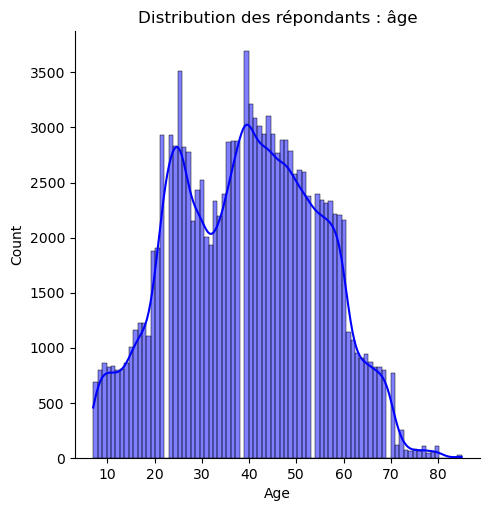

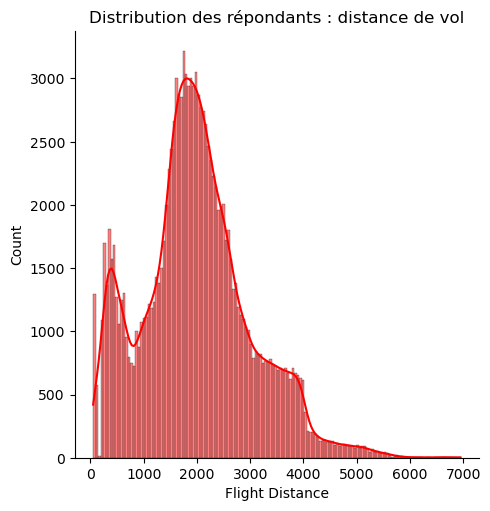

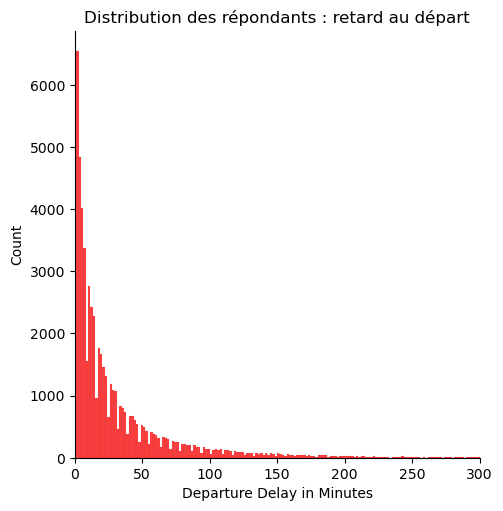

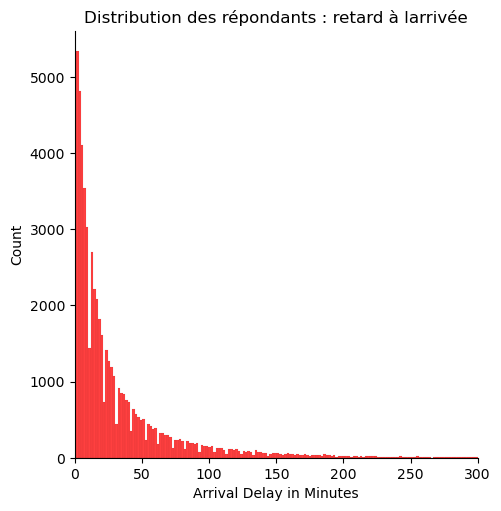

In [60]:
# Distribution des variables quantitatives : Age, flight distance, Departure delay, Arrival delay

sns.displot(x='Age', data=df, kind='hist',kde=True ,color='blue')
plt.title('Distribution des répondants : âge')

sns.displot(x='Flight Distance', data=df, kind='hist',kde=True ,color='red')
plt.title('Distribution des répondants : distance de vol')

sns.displot(x='Departure Delay in Minutes', data=df[df['Departure Delay in Minutes']>0], color='red')
plt.title('Distribution des répondants : retard au départ')
plt.xlim(0,300)

sns.displot(x='Arrival Delay in Minutes', data=df[df['Arrival Delay in Minutes']>0], color='red')
plt.title('Distribution des répondants : retard à larrivée')
plt.xlim(0,300)

plt.show();

## III. Analyse bivariée

### a. Profil des clients

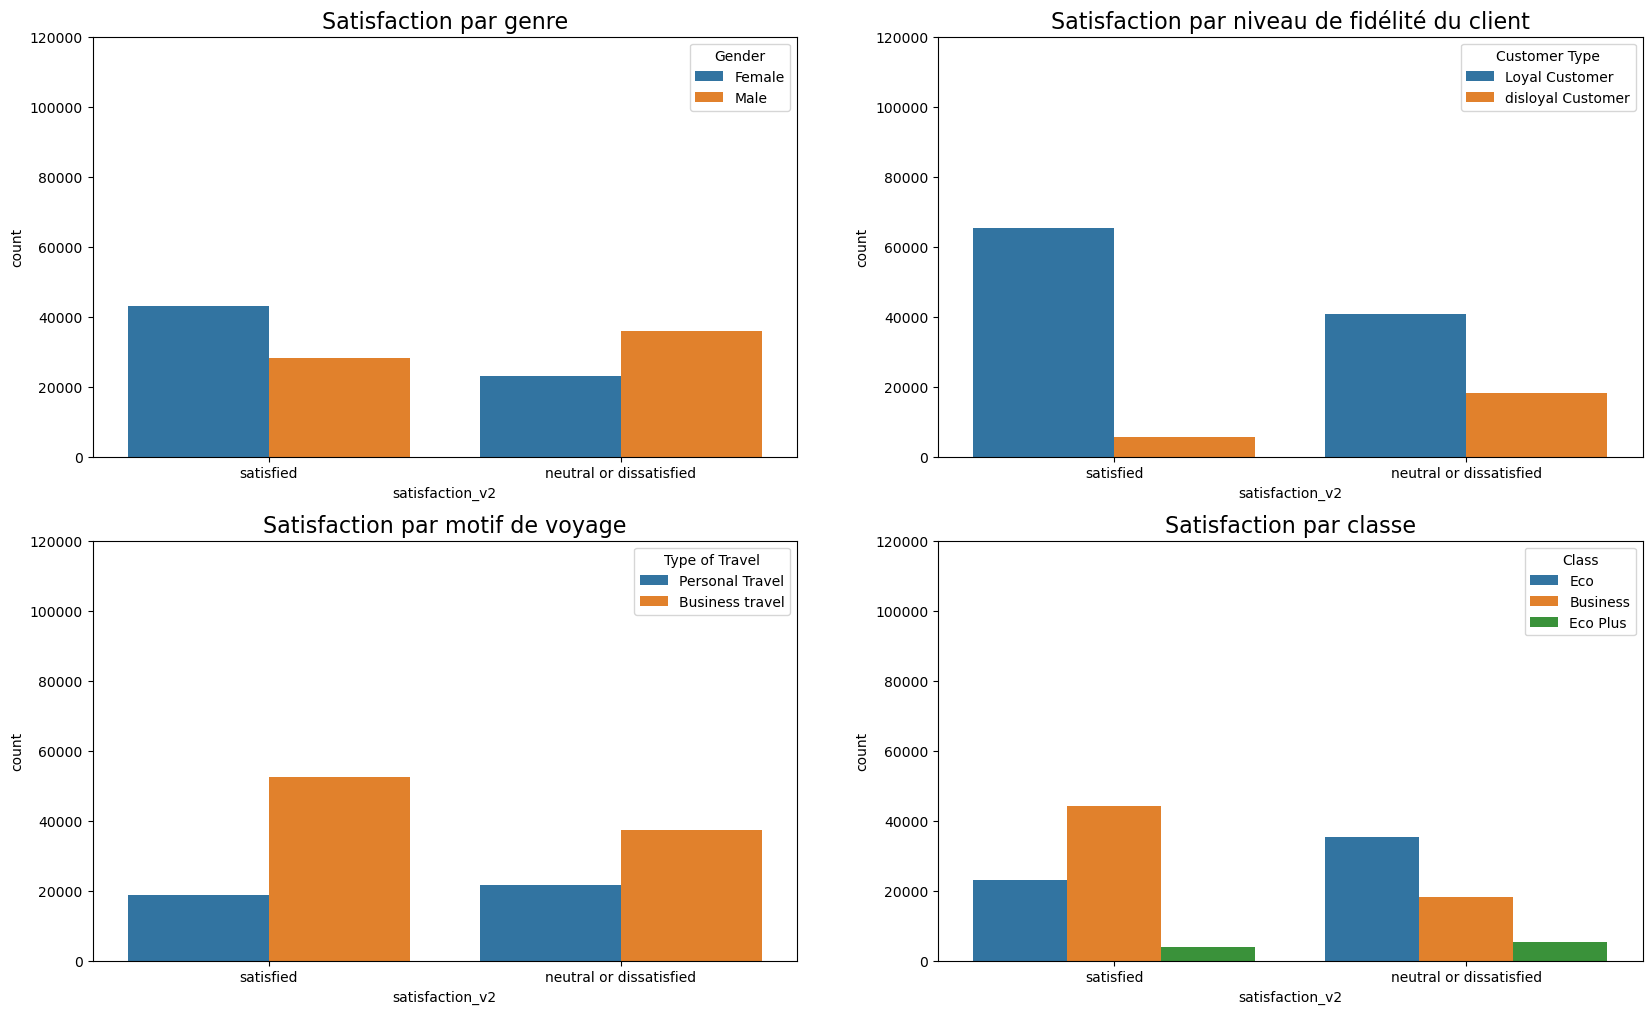

In [79]:
# Analyse bivariée : Satisfaction par genre, par niveau de fidélité du client, par motif de voyage
# par classe

plt.figure(figsize=(20,12))
plt.subplot(221)
plt.title('Satisfaction par genre',fontsize=16)
sns.countplot(x='satisfaction_v2',hue=df['Gender'],data=df)
plt.ylim(0,120000)

plt.subplot(222)
plt.title('Satisfaction par niveau de fidélité du client',fontsize=16)
sns.countplot(x='satisfaction_v2',hue=df['Customer Type'],data=df)
plt.ylim(0,120000)

plt.subplot(223)
plt.title('Satisfaction par motif de voyage',fontsize=16)
sns.countplot(x='satisfaction_v2',hue=df['Type of Travel'],data=df)
plt.ylim(0,120000)

plt.subplot(224)
plt.title('Satisfaction par classe',fontsize=16)
sns.countplot(x='satisfaction_v2',hue=df['Class'],data=df)
plt.ylim(0,120000)

plt.show();

### b. Zoom sur les retards

On time    0.564798
Delay      0.435202
Name: DD_bin, dtype: float64


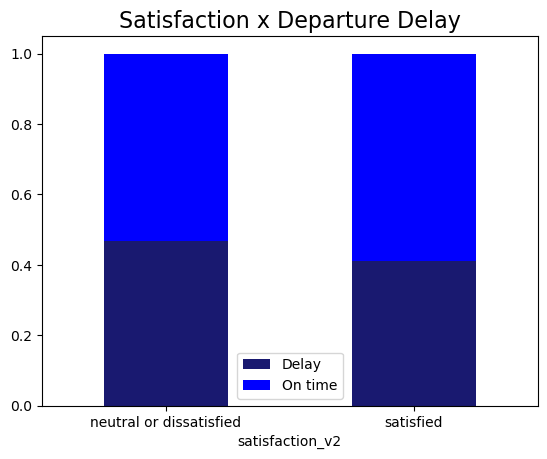

In [123]:
# Découpage de la variable Departure Delay in Minutes en 2 :'On time'/'Delay'
df['DD_bin']=df['Departure Delay in Minutes'].apply(lambda x : 'On time' if x ==0 else 'Delay')
print(df.DD_bin.value_counts(normalize=True))

# Croisement satisfaction et l'existence de retards ou non
crosstb = pd.crosstab(df.satisfaction_v2,df.DD_bin,normalize='index')
plt_DD = crosstb.plot(kind="bar", stacked=True, rot=0, color=['midnightblue','blue'])
plt.title('Satisfaction x Departure Delay', fontsize=16)
plt.legend(loc='best')
plt.show();

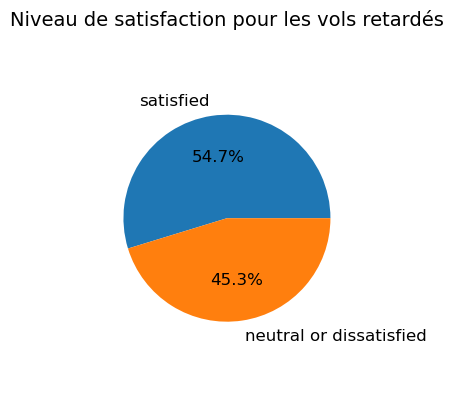

In [124]:
# Niveau de satisfaction pour les vols retardés
df['satisfaction_v2'].value_counts('Delay').plot(kind='pie',labeldistance=1.15,
                                            radius=0.7,autopct='%1.1f%%',textprops={'fontsize': 12})
plt.ylabel("")
plt.title('Niveau de satisfaction pour les vols retardés', fontsize=14)
plt.show();

### c. Satisfaction client à chaque étape du parcours

#### Pendant le vol 

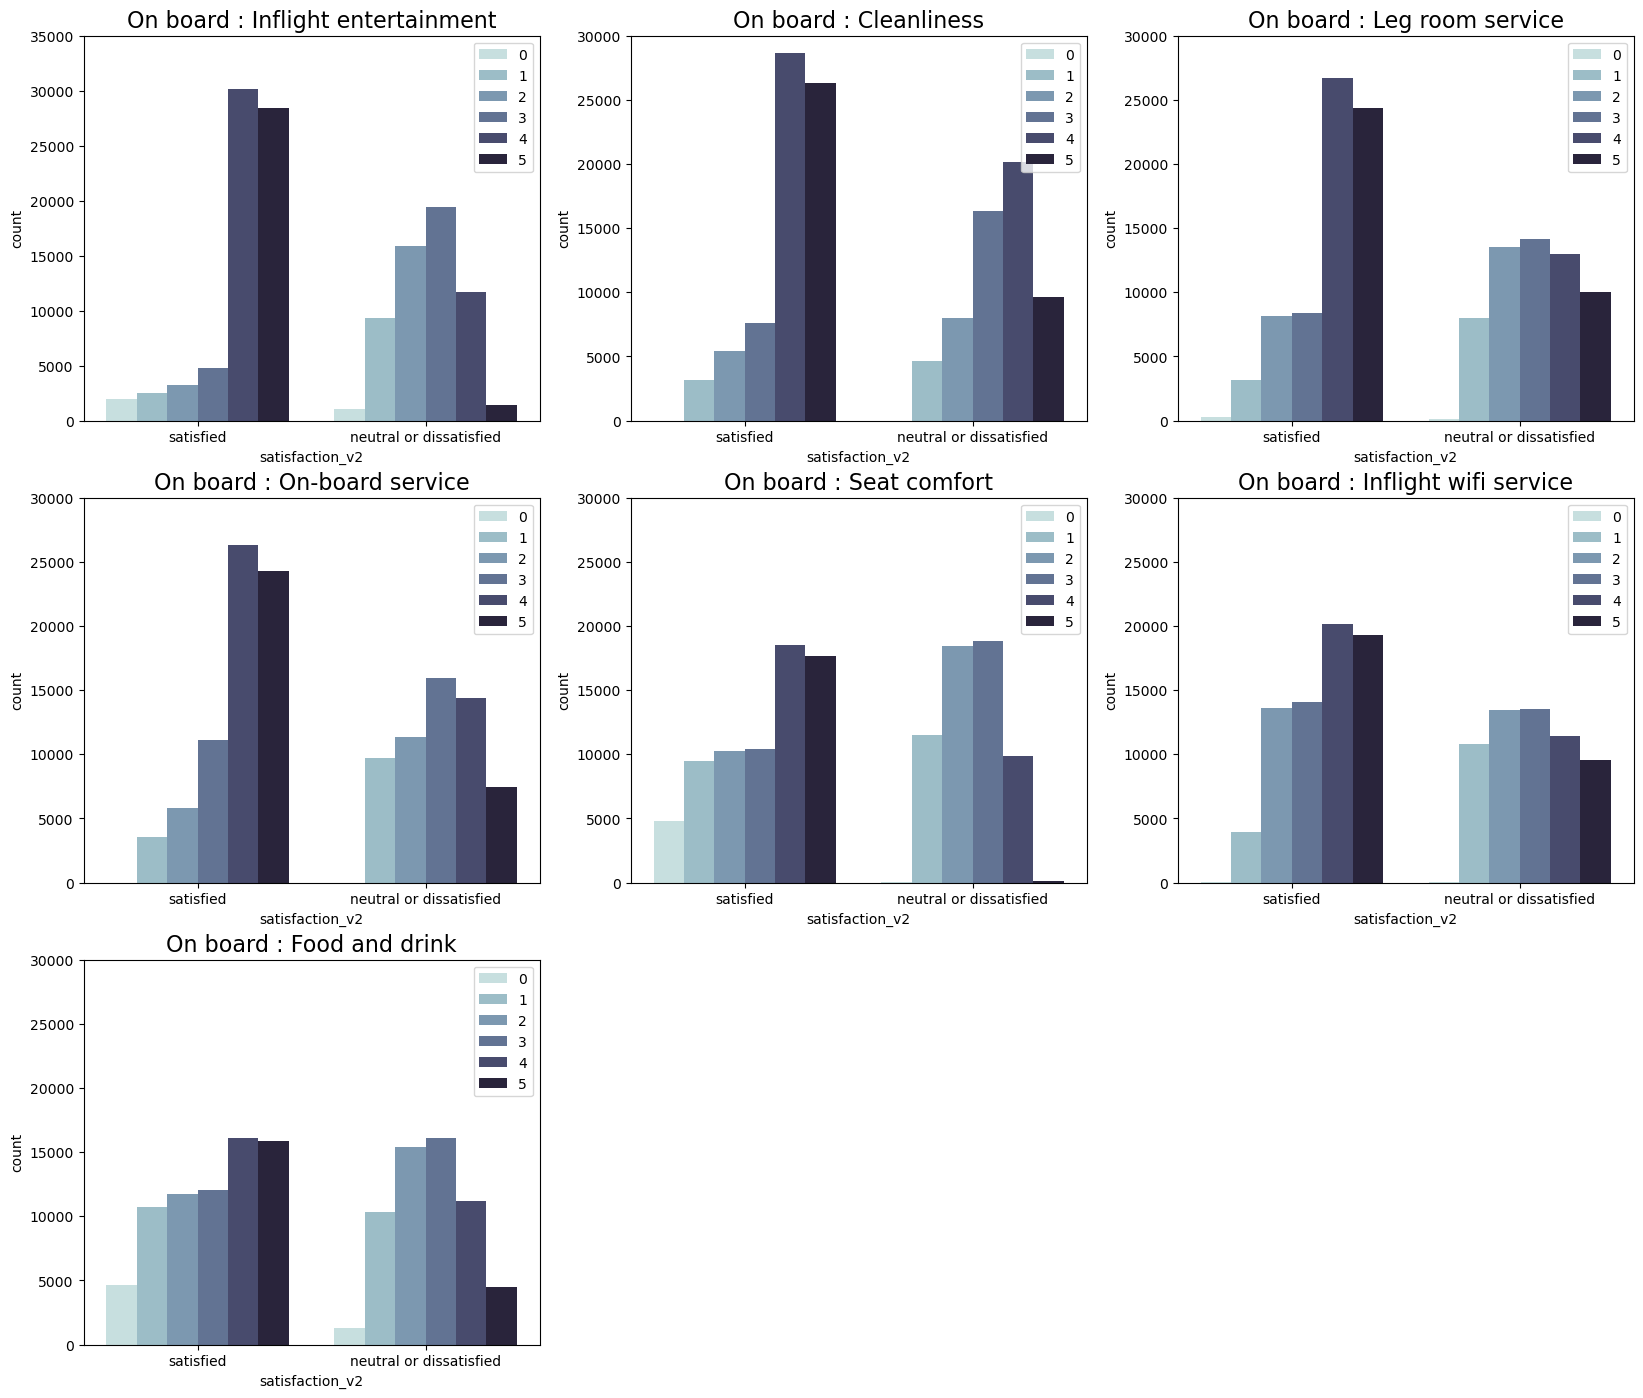

In [84]:
plt.figure(figsize=(20,17))

plt.subplot(331)
ax1=sns.countplot(x='satisfaction_v2',data=df,hue='Inflight entertainment',palette="ch:start=.2,rot=-.3")
plt.title('On board : Inflight entertainment',fontsize=16)
plt.ylim(0,35000)
ax1.legend(loc='best')

plt.subplot(332)
ax2=sns.countplot(x='satisfaction_v2',data=df,hue='Cleanliness',palette="ch:start=.2,rot=-.3")
plt.title('On board : Cleanliness',fontsize=16)
plt.ylim(0,30000)
ax2.legend(loc='best')

plt.subplot(333)
ax3=sns.countplot(x='satisfaction_v2',data=df,hue='Leg room service',palette="ch:start=.2,rot=-.3")
plt.title('On board : Leg room service',fontsize=16)
plt.ylim(0,30000)
ax3.legend(loc='best')

plt.subplot(334)
ax4=sns.countplot(x='satisfaction_v2',data=df,hue='On-board service',palette="ch:start=.2,rot=-.3")
plt.title('On board : On-board service',fontsize=16)
plt.ylim(0,30000)
ax4.legend(loc='best')

plt.subplot(335)
ax5=sns.countplot(x='satisfaction_v2',data=df,hue='Seat comfort',palette="ch:start=.2,rot=-.3")
plt.title('On board : Seat comfort',fontsize=16)
plt.ylim(0,30000)
ax5.legend(loc='best')

plt.subplot(336)
ax6=sns.countplot(x='satisfaction_v2',data=df,hue='Inflight wifi service',palette="ch:start=.2,rot=-.3")
plt.title('On board : Inflight wifi service',fontsize=16)
plt.ylim(0,30000)
ax6.legend(loc='best')

plt.subplot(337)
ax7=sns.countplot(x='satisfaction_v2',data=df,hue='Food and drink',palette="ch:start=.2,rot=-.3")
plt.title('On board : Food and drink',fontsize=16)
plt.ylim(0,30000)
ax7.legend(loc='best');

plt.show()

#### Avant/Après le vol

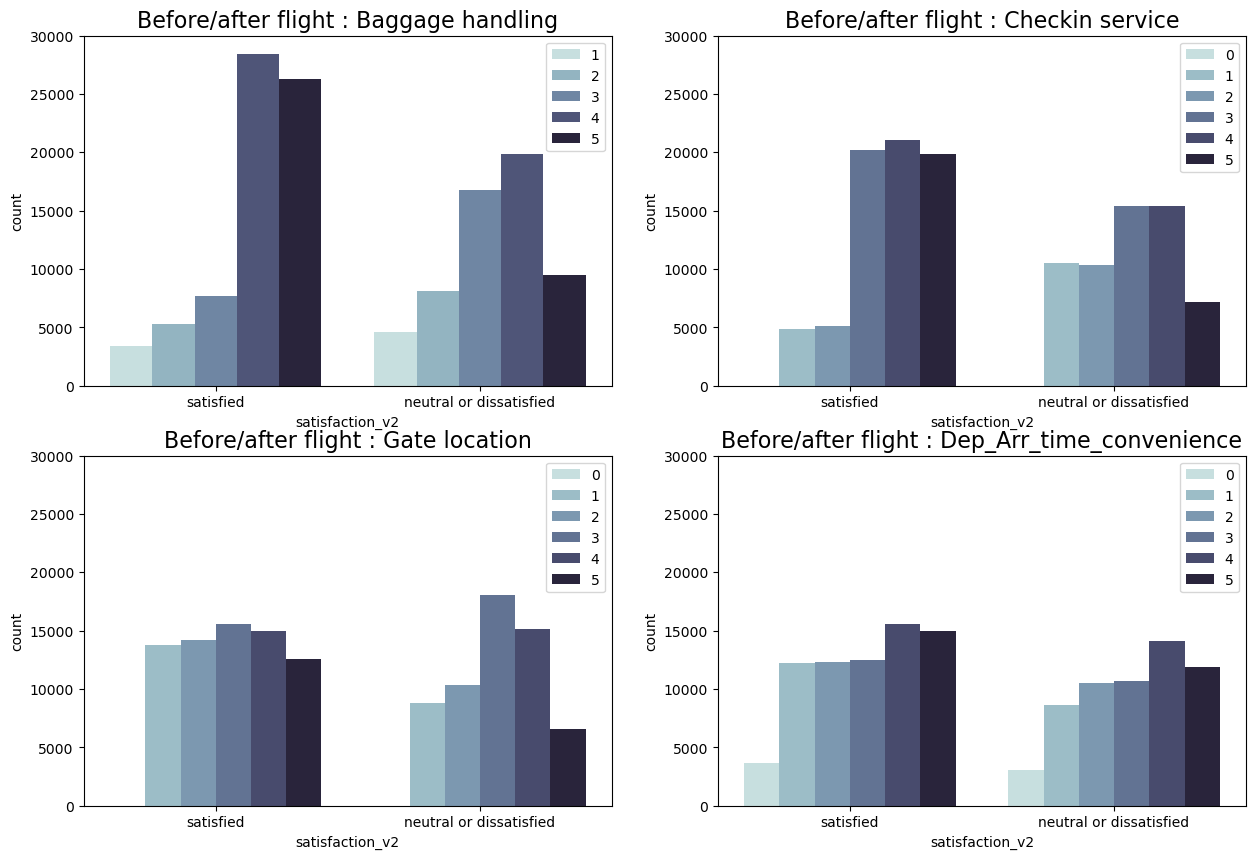

In [88]:
# ENREGISTREMENT + EMBARQUEMENT + BAGAGES
plt.figure(figsize=(15,10))

plt.subplot(221)
ax1=sns.countplot(x='satisfaction_v2',data=df,hue='Baggage handling',palette="ch:start=.2,rot=-.3")
plt.title('Before/after flight : Baggage handling',fontsize=16)
plt.ylim(0,30000)
ax1.legend(loc='best')

plt.subplot(222)
ax2=sns.countplot(x='satisfaction_v2',data=df,hue='Checkin service',palette="ch:start=.2,rot=-.3")
plt.title('Before/after flight : Checkin service',fontsize=16)
plt.ylim(0,30000)
ax2.legend(loc='best')

plt.subplot(223)
ax3=sns.countplot(x='satisfaction_v2',data=df,hue='Gate location',palette="ch:start=.2,rot=-.3")
plt.title('Before/after flight : Gate location',fontsize=16)
plt.ylim(0,30000)
ax3.legend(loc='best')

plt.subplot(224)
ax4=sns.countplot(x='satisfaction_v2',data=df,hue='Departure/Arrival time convenient',palette="ch:start=.2,rot=-.3")
plt.title('Before/after flight : Dep_Arr_time_convenience',fontsize=16)
plt.ylim(0,30000)
ax4.legend(loc='best');

plt.show()

#### Service en ligne

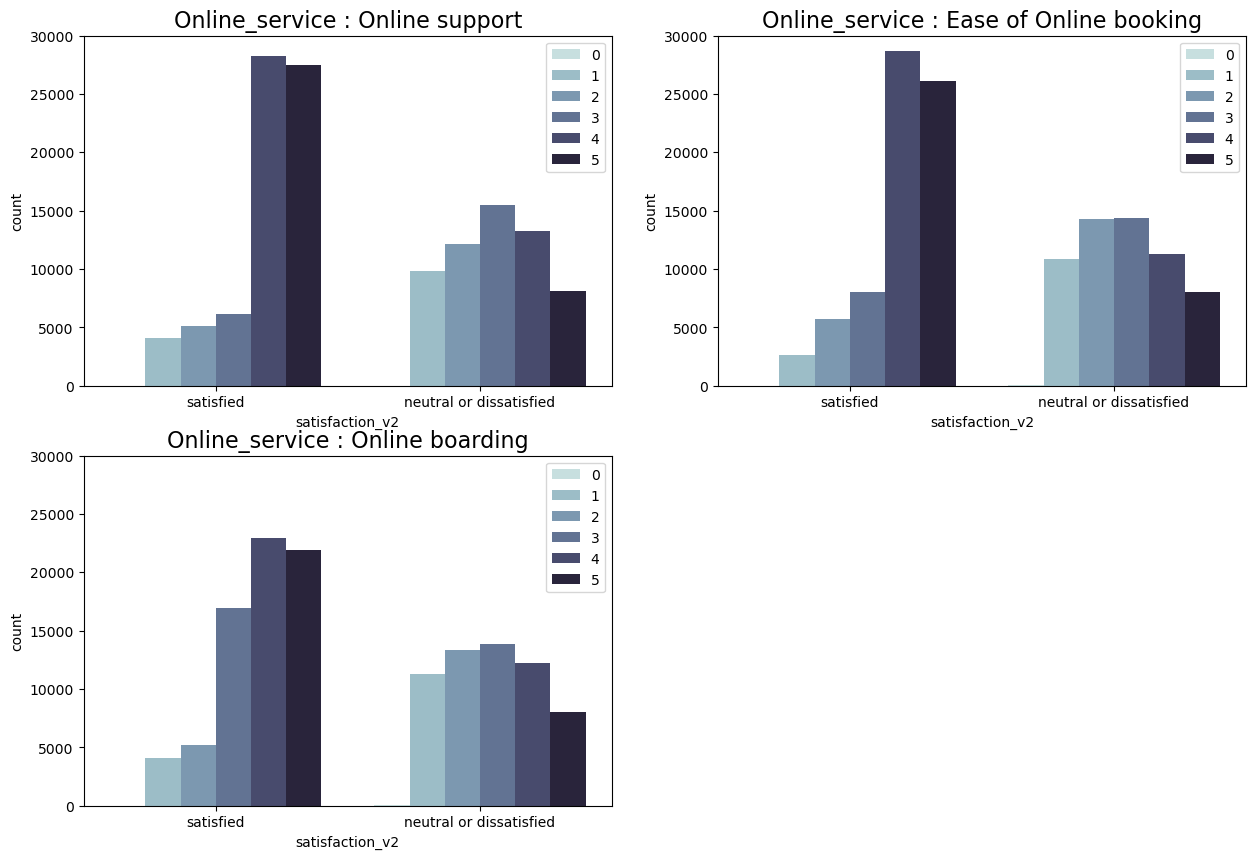

In [89]:
plt.figure(figsize=(15,10))

plt.subplot(221)
ax1=sns.countplot(x='satisfaction_v2',data=df,hue='Online support',palette="ch:start=.2,rot=-.3")
plt.title('Online_service : Online support',fontsize=16)
plt.ylim(0,30000)
ax1.legend(loc='best')

plt.subplot(222)
ax2=sns.countplot(x='satisfaction_v2',data=df,hue='Ease of Online booking',palette="ch:start=.2,rot=-.3")
plt.title('Online_service : Ease of Online booking',fontsize=16)
plt.ylim(0,30000)
ax2.legend(loc='best')

plt.subplot(223)
ax3=sns.countplot(x='satisfaction_v2',data=df,hue='Online boarding',palette="ch:start=.2,rot=-.3")
plt.title('Online_service : Online boarding',fontsize=16)
plt.ylim(0,30000)
ax3.legend(loc='best')

plt.show();

# III. Statistiques

## a. Heatmap sur variables continues

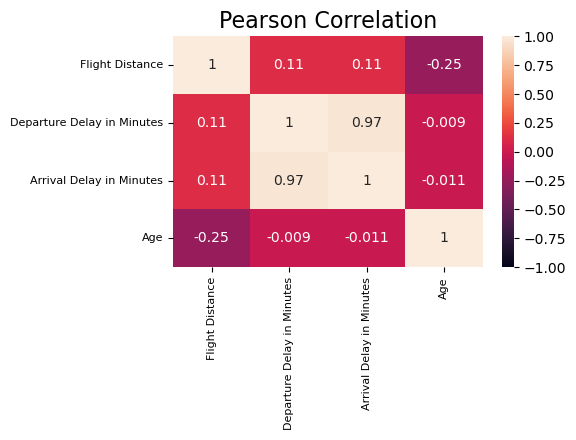

In [146]:
# On garde les variables continues seulement
r = df[['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Age']].corr()
plt.figure(figsize=(5,3))
heatmap = sns.heatmap(r, vmin=-1, 
                  vmax=1, annot=True)
plt.title("Pearson Correlation", fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## b. Heatmap sur notes de satisfaction

In [147]:
# Suppression des variables inutiles
df_corr=df.drop(['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes', 'Age','id'], axis=1)
df_corr['satisfaction']=df_corr['satisfaction_v2'].apply(lambda x : 1 if x=='satisfied' else 0)

In [150]:
# Heatmap correlation des rangs
def display_correlation(df):
    r = df_corr.corr(method="spearman")
    plt.figure(figsize=(16,10))
    heatmap = sns.heatmap(r, vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation", fontsize=16)
    plt.show()
    #return(r)

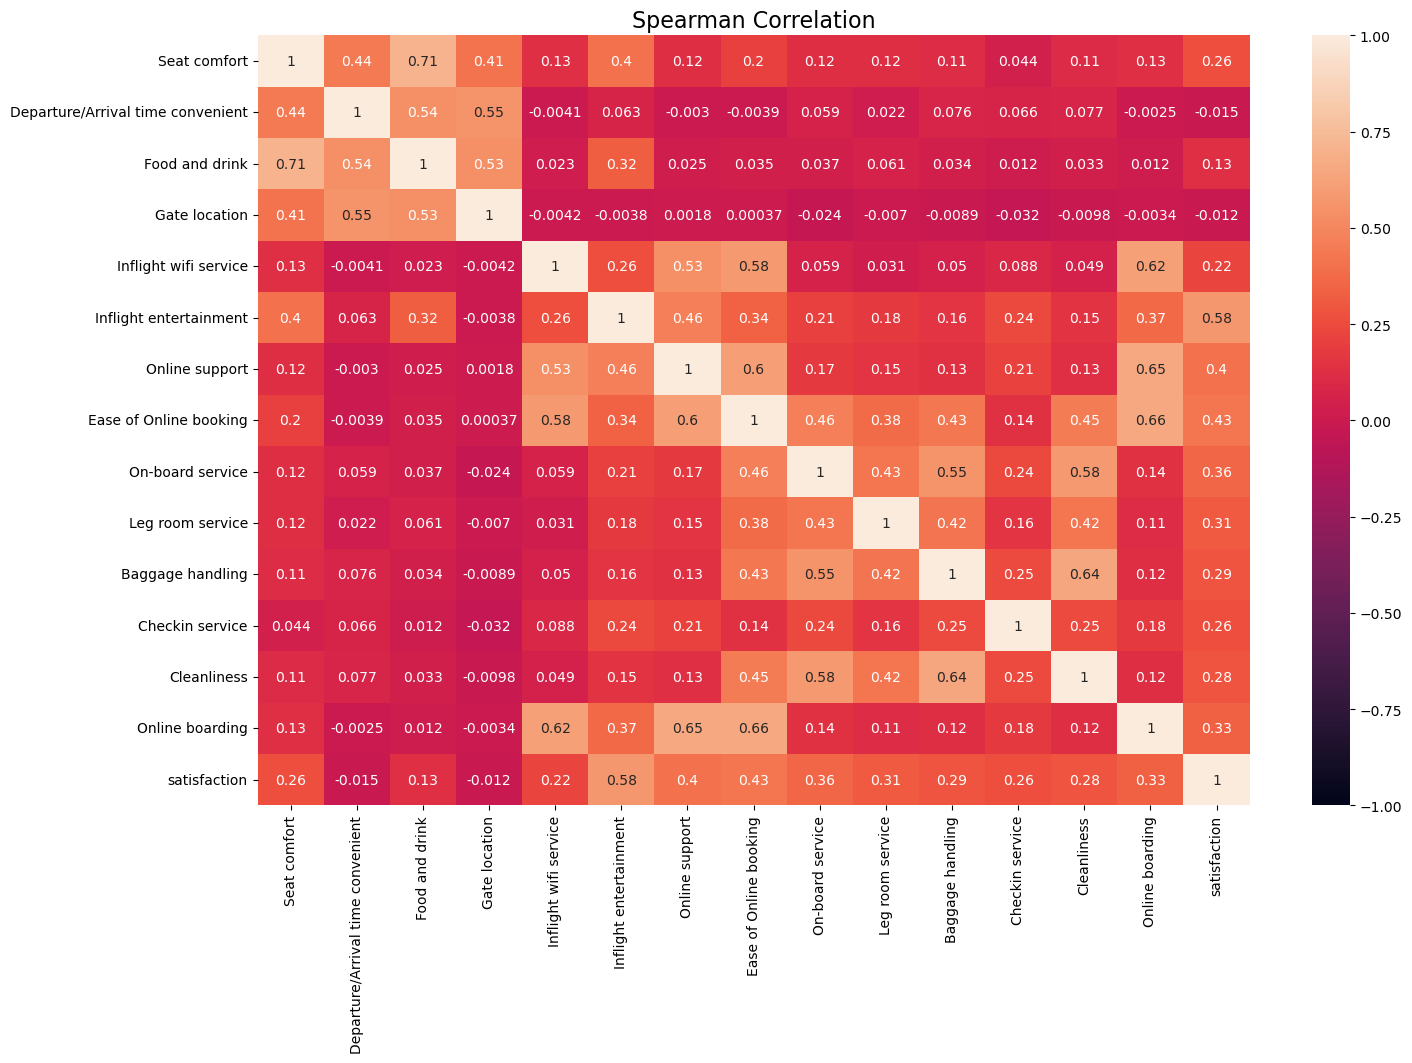

In [151]:
display_correlation(df_corr)

## c. V Cramer

In [152]:
# Découpage en classes des variables continues (hors notes de SAT) 
df['DD_CUT']=df['Departure Delay in Minutes'].apply(lambda x: '1-Aucun retard' if x ==0 else ('2-Jusqua 30 min' if 1<=x<30 
                                                 else ('3-Entre 30 et 60 min' if 30<=x<60 else '4-Au-delà de 60 min')))

df['AD_CUT']=df['Arrival Delay in Minutes'].apply(lambda x: '1-Aucun retard' if x ==0 else ('2-Jusqua 30 min' if 1<=x<30 
                                                 else ('3-Entre 30 et 60 min' if 30<=x<60 else '4-Au-delà de 60 min')))

df['FD_CUT']=df['Flight Distance'].apply(lambda x: '1- Moins de 1350 miles' if x<1350 else ('2-Entre 1350 et 1950 miles'
                                                 if 1350<=x<1950 else('3-Entre 1950 et 2500 miles' if 1950<=x<2500 else 
                                                '4-Au-delà de 2500 miles')))
df['AD_time_conv']=df['Departure/Arrival time convenient'].apply(lambda x: 0 if x<4 else 1)

# Découpage de la variable âge en quantiles
age_quantiles = pd.qcut(df['Age'], 4, labels=False)
age_quantiles=age_quantiles.rename('Age_cut')
df=df.join(pd.DataFrame(age_quantiles))

# Suppression des variabes inutiles
df_final=df.drop(['id','Age', 'Departure Delay in Minutes',
                  'Arrival Delay in Minutes','Flight Distance'],axis=1)

df_final=df_final[['satisfaction_v2','Gender','Customer Type','Type of Travel','Class','DD_CUT','AD_CUT','FD_CUT','Age_cut']]

In [153]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Croisement des variables
    stat = chi2_contingency(crosstab)[0] # Test du Chi2
    obs = np.sum(crosstab) # Nombre d'observations
    mini = min(crosstab.shape)-1 # On prend le min du shape en lignes et colonnes - 1 degré de liberté
    return (np.sqrt(stat/(obs*mini)))

In [154]:
# On crée la matrice V Cramer 
rows= []
for var1 in df_final:
    col = []
    for var2 in df_final :
        cramers =cramers_V(df_final[var1], df_final[var2]) 
        col.append(round(cramers,2))
    rows.append(col)

cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = df_final.columns, index =df_final.columns)

C:\Users\PC\AppData\Local\Temp\ipykernel_10436\2365505682.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_cramer, dtype=np.bool)


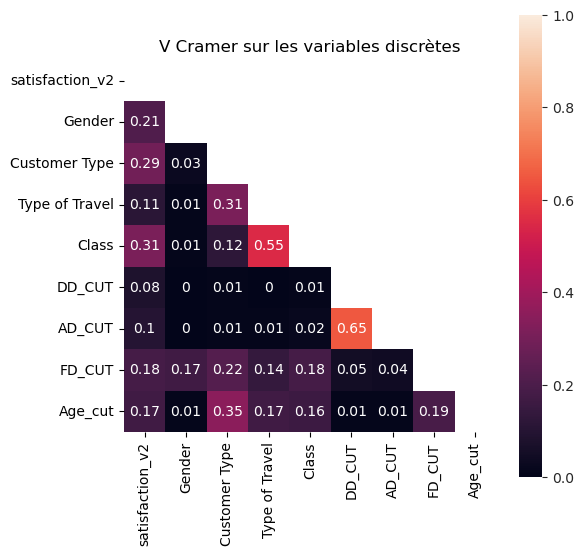

In [157]:
# On applique un masque pour la visualisation de la matrice
mask = np.zeros_like(df_cramer, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig,ax=plt.subplots(figsize=(6,6))
with sns.axes_style("white"):
    ax = sns.heatmap(df_cramer, mask=mask,vmin=0., vmax=1, square=True, annot=True)
plt.title('V Cramer sur les variables discrètes')
plt.show()